## Lab4
Закріпити знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. Практичне завдання спрямоване на розвиток навичок роботи з реальними даними, підготовки даних, побудови моделей та їх оцінки

1. Підготовка середовища:
    - Встановіть необхідні бібліотеки, такі як pandas, numpy, scikit-learn, matplotlib, та seaborn.
    - Завантажте набір даних Titanic з Kaggle або використайте вбудовані дані Titanic з бібліотеки seaborn.

In [13]:
import pandas as pd


titanic_df = pd.read_csv('titanic/train.csv')

titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

2. Ознайомлення з даними:
    - Виведіть перші 10 рядків набору даних.
    - Отримайте базову статистику за допомогою методу describe() та дослідіть пропущені значення.


In [14]:
titanic_df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [15]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3. Попередня обробка даних:
    - Визначте та обробіть пропущені значення:
        - У змінній Age заповніть пропуски середнім значенням.
        - У змінній Embarked заповніть пропуски найбільш поширеним значенням (модою).
    - Закодуйте категоріальні змінні:
        - Використайте One-Hot Encoding для змінних Sex та Embarked.
    - Створіть нові ознаки:
        - Додайте змінну FamilySize, яка буде сумою SibSp та Parch.

In [16]:
age_avg = titanic_df['Age'].mean()
embarked_mode = titanic_df['Embarked'].mode()[0]

titanic_df['Age'] = titanic_df['Age'].fillna(age_avg)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(embarked_mode)

titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)

titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,22.0,1,0,7.2500,True,False,False,True,1
1,2,1,1,38.0,1,0,71.2833,False,True,False,False,1
2,3,1,3,26.0,0,0,7.9250,False,False,False,True,0
3,4,1,1,35.0,1,0,53.1000,False,False,False,True,1
4,5,0,3,35.0,0,0,8.0500,True,False,False,True,0


4. Поділ даних на тренувальну та тестову вибірки:
    - Розділіть набір даних на тренувальну (80%) та тестову (20%) вибірки, використовуючи train_test_split() з бібліотеки scikit-learn.

In [17]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)



5. Побудова моделей:
    - Реалізуйте наступні моделі для бінарної класифікації:
        - Логістична регресія.
        - Дерева рішень.
        - Випадкові ліси (Random Forest).
    - Для кожної моделі виконайте:
        - Тренування на тренувальній вибірці.
        - Передбачення на тестовій вибірці.
        - Оцінку метрик: точність (accuracy), precision, recall, F1-score.


- логістична регресія

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Scores for the {model_name}')
    print(f'Accuracy - {accuracy:.4f}')
    print(f'Precision - {precision:.4f}')
    print(f'Recall - {recall:.4f}') 
    print(f'F1 Score - {f1:.4f}')
    print('-' * 30) 

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

evaluate_model(y_test, log_reg_pred, 'Logistic Regression')

Scores for the Logistic Regression
Accuracy - 0.7821
Precision - 0.7627
Recall - 0.6429
F1 Score - 0.6977
------------------------------


- Дерево рішень

In [19]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=666)
dec_tree.fit(X_train, y_train)

dec_tree_pred =  dec_tree.predict(X_test)

evaluate_model(y_test, dec_tree_pred, 'Decision Tree')

Scores for the Decision Tree
Accuracy - 0.7486
Precision - 0.6866
Recall - 0.6571
F1 Score - 0.6715
------------------------------


- Випадкові ліси

In [20]:
from sklearn.ensemble import RandomForestClassifier

ran_forest = RandomForestClassifier(n_estimators=100, random_state=666)
ran_forest.fit(X_train, y_train)

ran_forest_pred = ran_forest.predict(X_test)

evaluate_model(y_test, ran_forest_pred, 'Random Forest')

Scores for the Random Forest
Accuracy - 0.8156
Precision - 0.7846
Recall - 0.7286
F1 Score - 0.7556
------------------------------


6. Оцінка результатів:
    - Побудуйте матрицю плутанини для кожної моделі.
    - Виведіть ROC-криву та AUC для кожної моделі, використовуючи методи roc_curve() та auc().

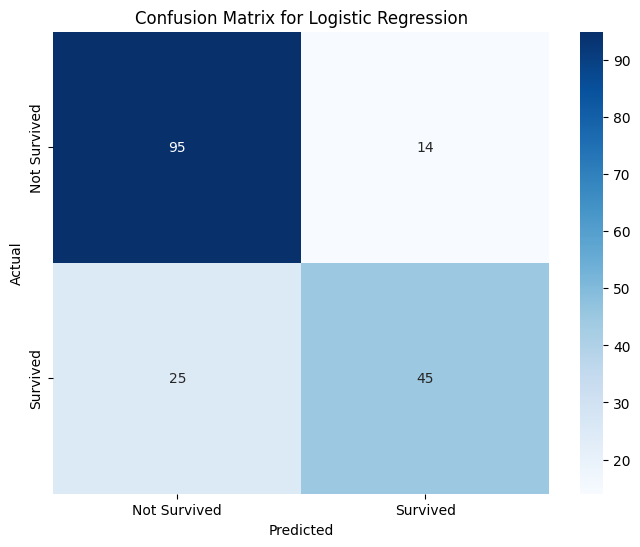

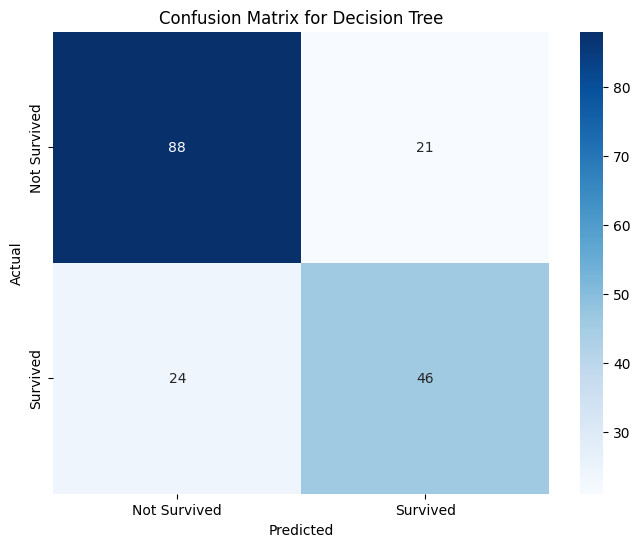

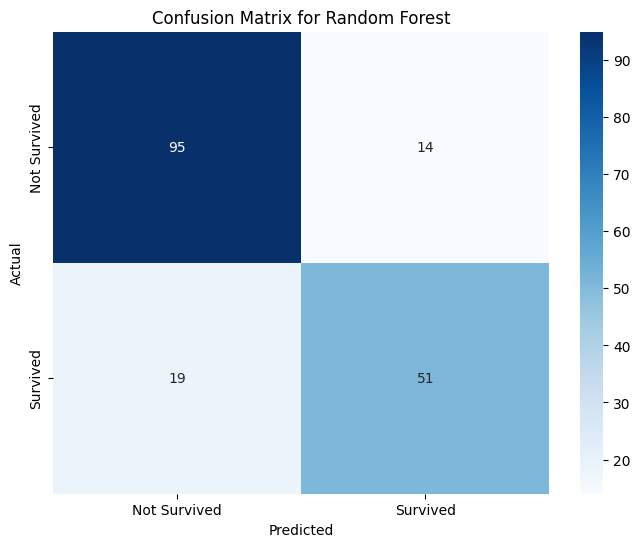

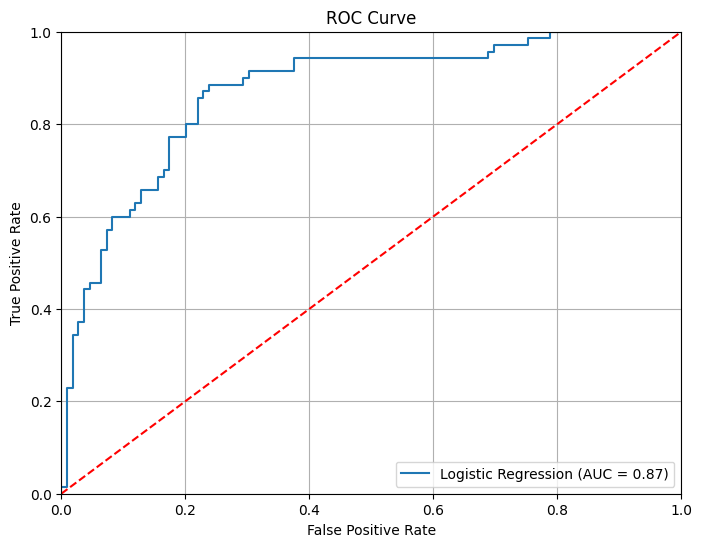

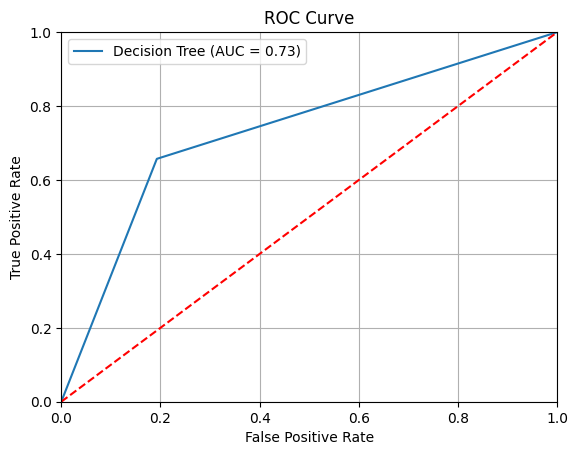

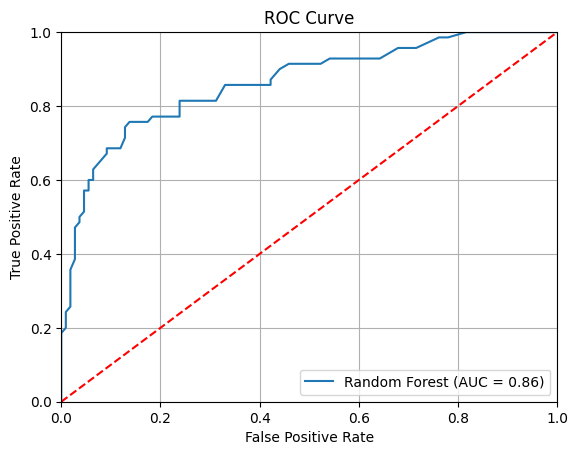

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

log_reg_cm = confusion_matrix(y_test, log_reg_pred)
dec_tree_cm = confusion_matrix(y_test, dec_tree_pred)
ran_forest_cm = confusion_matrix(y_test, ran_forest_pred)

plot_confusion_matrix(log_reg_cm, 'Logistic Regression')
plot_confusion_matrix(dec_tree_cm, 'Decision Tree')
plot_confusion_matrix(ran_forest_cm, 'Random Forest')


log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
dec_tree_probs = dec_tree.predict_proba(X_test)[:, 1]
ran_forest_probs = ran_forest.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, log_reg_probs, 'Logistic Regression')
plot_roc_curve(y_test, dec_tree_probs, 'Decision Tree')
plot_roc_curve(y_test, ran_forest_probs, 'Random Forest')



7. Оптимізація моделі:
    - Виконайте крос-валідацію для логістичної регресії та дерев рішень.
    - Оптимізуйте гіперпараметри для випадкового лісу, використовуючи GridSearchCV або RandomizedSearchCV.


GridSearchCV для Random Forest


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

ran_forest = RandomForestClassifier(random_state=666)

grid_search = GridSearchCV(estimator=ran_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')


крос-валідація для логістичної регресії

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=2000)
dec_tree = DecisionTreeClassifier(random_state=666)

log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5) 
dec_tree_cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=5)

print(f'Logistic Regression CV Accuracy: {log_reg_cv_scores.mean():.4f}')
print(f'Decision Tree CV Accuracy: {dec_tree_cv_scores.mean():.4f}')


Logistic Regression CV Accuracy: 0.8005
Decision Tree CV Accuracy: 0.7499


8. Порівняння моделей:
    - Порівняйте ефективність кожної моделі на основі метрик (точність, precision, recall, F1-score) та виберіть найкращу модель.

На основі метрик accuracy  precision, recall, F1-score найкращою моделлю є Random Forest

9. Завдання з творчим підходом:
    - Проаналізуйте важливість ознак для моделі випадкового лісу та з’ясуйте, які змінні найбільше впливають на виживання.
    - Запропонуйте власні ідеї для покращення моделі (наприклад, додавання нових ознак або удосконалення способів обробки пропущених даних).


In [25]:
import numpy as np

feature_importances = ran_forest.feature_importances_

sorted_idx = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")


Feature importances:
Sex_male: 0.2374
PassengerId: 0.1926
Fare: 0.1802
Age: 0.1745
Pclass: 0.0765
FamilySize: 0.0464
SibSp: 0.0315
Parch: 0.0236
Embarked_S: 0.0148
Embarked_C: 0.0138
Embarked_Q: 0.0086


Найважливішими змінними виявились стать, Id, ціна, та вік

Для покращення мооделі можна було б обробити невідомі значення інакше, наприклад вибрати вік на основі наявних даних, таких як SibSp